In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Question 1

In [118]:
student_data = pd.read_csv(r"C:\Users\sreeh\Downloads\Students_Performance.csv")

In [119]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [120]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [121]:
student_data.shape

(1000, 8)

In [122]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [123]:
student_data['math score'].mean()

66.001

In [124]:
student_data['reading score'].mean()

69.195

In [125]:
student_data['writing score'].mean()

68.119

# a) how many males and females participated in the test

In [126]:
gender_counts = student_data['gender'].value_counts()

In [127]:
gender_counts

gender
female    518
male      482
Name: count, dtype: int64

# b) student's parental level of education

In [128]:
parental_education_counts = student_data['parental level of education'].value_counts()


In [129]:
parental_education_counts

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [130]:
average_score_parental = student_data.groupby('parental level of education').mean('numeric_only=None')


In [131]:
average_score_parental

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,61.821429,64.602041,62.403061
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268


# c) Scores based on test preparation course for average for math, reading and writing 

In [132]:
average_scores_course = student_data.groupby('test preparation course').mean('numeric_only')


In [133]:
average_scores_course

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# c) Scores based on gender for average for math, reading and writing 

In [134]:
average_scores_gender = student_data.groupby('gender').mean('numeric_only')


In [135]:
average_scores_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


# d) Scoring variation based on gender

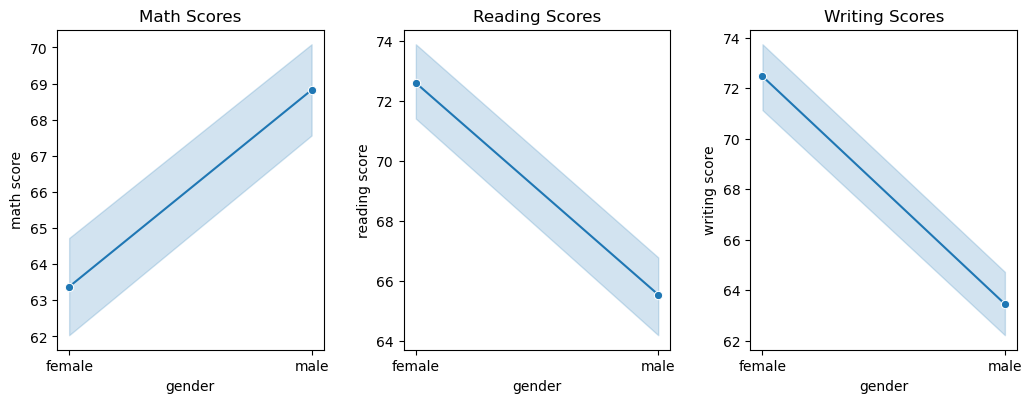

In [136]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.2)

plt.subplot(131)
plt.title('Math Scores')
sns.lineplot(x="gender", y="math score", data=student_data, marker='o')

plt.subplot(132)
plt.title('Reading Scores')
sns.lineplot(x="gender", y="reading score", data=student_data, marker='o')

plt.subplot(133)
plt.title('Writing Scores')
sns.lineplot(x="gender", y="writing score", data=student_data, marker='o')

plt.show()

# d) Scoring variation based on test preparation course

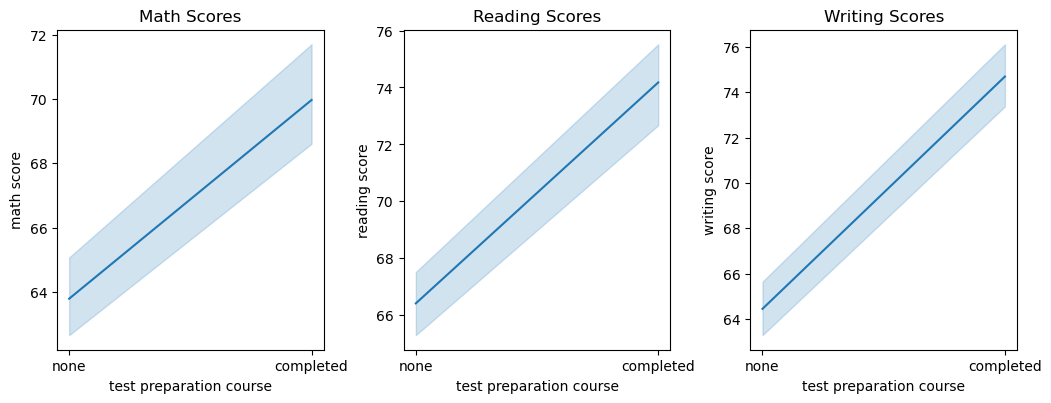

In [90]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.2)

plt.subplot(131)
plt.title('Math Scores')
sns.lineplot(x="test preparation course", y="math score", data=student_data)

plt.subplot(132)
plt.title('Reading Scores')
sns.lineplot(x="test preparation course", y="reading score", data=student_data)

plt.subplot(133)
plt.title('Writing Scores')
sns.lineplot(x="test preparation course", y="writing score", data=student_data)

plt.show()

# e)  top 25% of students based on their math score

In [97]:
a=student_data.sort_values('math score',ascending=False)
quantile_75 = a['math score'].quantile(q=0.75)
a[a['math score']>=quantile_75]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
421,female,group C,some college,free/reduced,none,77,90,91


# Question 2

In [99]:
sales = pd.read_csv(r"C:\Users\sreeh\Downloads\Sales_add.csv")

In [100]:
sales.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [104]:
sales.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

a) Null Hypothesis for this is there is no increase in sales after stepping into digital marketing and  Alternate Hypothesis is there is increase in sales after stepping into digital marketing 

In [109]:
tstat,p_value=ttest_ind(sales['Sales_before_digital_add(in $)'],sales['Sales_After_digital_add(in $)'])
p_value

2.614368006904645e-16

In [110]:
if p_value<0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


b)  Null hypothesis is-Region and Manager are independent and Alternate Hypothesis is- Region and Manager are dependent

In [115]:
crosstab=pd.crosstab(index=sales['Region'],columns=sales['Manager'])
chi2_stat,p_value1,dof,exp=chi2_contingency(crosstab)
p_value1

0.5493991051158094

In [116]:
if p_value1<0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Accept Null Hypothesis
